# (Core) Wide-Form Data
* **Nicholas Giuffrida**

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
# set random seed
SEED = 321
np.random.seed(SEED)

In [2]:
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
sns.set_context("talk", font_scale=0.9)

In [3]:
fpath = "Data/City_month.csv"
df = pd.read_csv(fpath)
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


In [4]:
# filter 4 largest cities
filter_size = df['SizeRank'] < 4
filter_size

0         True
1         True
2         True
3         True
4        False
         ...  
22462    False
22463    False
22464    False
22465    False
22466    False
Name: SizeRank, Length: 22467, dtype: bool

In [5]:
# Apply the filter to create a dataframe
df_filtered = df[filter_size]
df_filtered

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [6]:
df_filtered.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [7]:
melted = pd.melt(df_filtered.drop(columns=['RegionID','RegionType','StateName',
                                      'SizeRank',     'Metro','CountyName']),
                 id_vars=['RegionName', 'State'],
                var_name="Date")
melted
 

,RegionName,State,Date,value
0,New York,NY,2000-01-31,253690.0
1,Los Angeles,CA,2000-01-31,234181.0
2,Houston,TX,2000-01-31,109068.0
3,Chicago,IL,2000-01-31,166139.0
4,New York,NY,2000-02-29,255517.0
...,...,...,...,...
1087,Chicago,IL,2022-08-31,315587.0
1088,New York,NY,2022-09-30,781622.0
1089,Los Angeles,CA,2022-09-30,966595.0
1090,Houston,TX,2022-09-30,272639.0


In [8]:
melted['Date'] = pd.to_datetime(melted['Date'])
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionName  1092 non-null   object        
 1   State       1092 non-null   object        
 2   Date        1092 non-null   datetime64[ns]
 3   value       1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 34.2+ KB


In [9]:
melted = melted.set_index("Date")
melted

,RegionName,State,value
Date,,,
2000-01-31,New York,NY,253690.0
2000-01-31,Los Angeles,CA,234181.0
2000-01-31,Houston,TX,109068.0
2000-01-31,Chicago,IL,166139.0
2000-02-29,New York,NY,255517.0
...,...,...,...
2022-08-31,Chicago,IL,315587.0
2022-09-30,New York,NY,781622.0
2022-09-30,Los Angeles,CA,966595.0


In [26]:
df_ts = melted.groupby('RegionName').resample("M").mean()
df_ts

/var/folders/3l/3f2y6zdj0w1ctd941bfr2s2m0000gn/T/ipykernel_58964/906173531.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('RegionName').resample("M").mean()
/var/folders/3l/3f2y6zdj0w1ctd941bfr2s2m0000gn/T/ipykernel_58964/906173531.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('RegionName').resample("M").mean()
/var/folders/3l/3f2y6zdj0w1ctd941bfr2s2m0000gn/T/ipykernel_58964/906173531.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify nu

value
RegionName Date                
Chicago    2000-01-31  166139.0
           2000-02-29  166536.0
           2000-03-31  167368.0
           2000-04-30  168826.0
           2000-05-31  170499.0
...                         ...
New York   2022-05-31  768797.0
           2022-06-30  773944.0
           2022-07-31  777692.0
           2022-08-31  779960.0
           2022-09-30  781622.0

[1092 rows x 1 columns]

In [11]:
df_ts.head().index

MultiIndex([('Chicago', '2000-01-31'),
            ('Chicago', '2000-02-29'),
            ('Chicago', '2000-03-31'),
            ('Chicago', '2000-04-30'),
            ('Chicago', '2000-05-31')],
           names=['RegionName', 'Date'])

In [12]:
df_ts = df_ts.loc[pd.IndexSlice[:, '2008'],:]
df_ts

value
RegionName  Date                
Chicago     2008-01-31  300207.0
            2008-02-29  296063.0
            2008-03-31       NaN
            2008-04-30       NaN
            2008-05-31  293467.0
            2008-06-30  288495.0
            2008-07-31  288174.0
            2008-08-31  283199.0
            2008-09-30  280695.0
            2008-10-31  274849.0
            2008-11-30  271059.0
            2008-12-31  265306.0
Houston     2008-01-31  138208.0
            2008-02-29  137512.0
            2008-03-31  136795.0
            2008-04-30  136628.0
            2008-05-31  136228.0
            2008-06-30  135773.0
            2008-07-31  135392.0
            2008-08-31  134770.0
            2008-09-30  133932.0
            2008-10-31  133189.0
            2008-11-30  132247.0
            2008-12-31  131283.0
Los Angeles 2008-01-31  603029.0
            2008-02-29  596635.0
            2008-03-31  586065.0
            2008-04-30  571226.0
            2008-05-31  554589.0
            2008-06-30  539622.0
            2008-07-31  524220.0
            2008-08-31  510520.0
            2008-09-30  500124.0
            2008-10-31  490979.0
            2008-11-30  481905.0
            2008-12-31  469294.0
New York    2008-01-31  546538.0
            2008-02-29  546098.0
            2008-03-31  544562.0
            2008-04-30  541865.0
            2008-05-31  537685.0
            2008-06-30  533810.0
            2008-07-31  529211.0
            2008-08-31  525290.0
            2008-09-30  521347.0
            2008-10-31  518048.0
            2008-11-30  514767.0
            2008-12-31  510309.0

In [13]:
plot_df = df_ts.copy()
plot_df

value
RegionName  Date                
Chicago     2008-01-31  300207.0
            2008-02-29  296063.0
            2008-03-31       NaN
            2008-04-30       NaN
            2008-05-31  293467.0
            2008-06-30  288495.0
            2008-07-31  288174.0
            2008-08-31  283199.0
            2008-09-30  280695.0
            2008-10-31  274849.0
            2008-11-30  271059.0
            2008-12-31  265306.0
Houston     2008-01-31  138208.0
            2008-02-29  137512.0
            2008-03-31  136795.0
            2008-04-30  136628.0
            2008-05-31  136228.0
            2008-06-30  135773.0
            2008-07-31  135392.0
            2008-08-31  134770.0
            2008-09-30  133932.0
            2008-10-31  133189.0
            2008-11-30  132247.0
            2008-12-31  131283.0
Los Angeles 2008-01-31  603029.0
            2008-02-29  596635.0
            2008-03-31  586065.0
            2008-04-30  571226.0
            2008-05-31  554589.0
            2008-06-30  539622.0
            2008-07-31  524220.0
            2008-08-31  510520.0
            2008-09-30  500124.0
            2008-10-31  490979.0
            2008-11-30  481905.0
            2008-12-31  469294.0
New York    2008-01-31  546538.0
            2008-02-29  546098.0
            2008-03-31  544562.0
            2008-04-30  541865.0
            2008-05-31  537685.0
            2008-06-30  533810.0
            2008-07-31  529211.0
            2008-08-31  525290.0
            2008-09-30  521347.0
            2008-10-31  518048.0
            2008-11-30  514767.0
            2008-12-31  510309.0

In [14]:
unstacked = plot_df.unstack(level=0)
unstacked

value                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2008-01-31  300207.0  138208.0    603029.0  546538.0
2008-02-29  296063.0  137512.0    596635.0  546098.0
2008-03-31       NaN  136795.0    586065.0  544562.0
2008-04-30       NaN  136628.0    571226.0  541865.0
2008-05-31  293467.0  136228.0    554589.0  537685.0
2008-06-30  288495.0  135773.0    539622.0  533810.0
2008-07-31  288174.0  135392.0    524220.0  529211.0
2008-08-31  283199.0  134770.0    510520.0  525290.0
2008-09-30  280695.0  133932.0    500124.0  521347.0
2008-10-31  274849.0  133189.0    490979.0  518048.0
2008-11-30  271059.0  132247.0    481905.0  514767.0
2008-12-31  265306.0  131283.0    469294.0  510309.0

In [15]:
unstacked['value'] = unstacked['value'].interpolate()

##  Qestion 1:
* Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [16]:
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Create the formatter
fmt_thous = mticks.FuncFormatter(thousands)

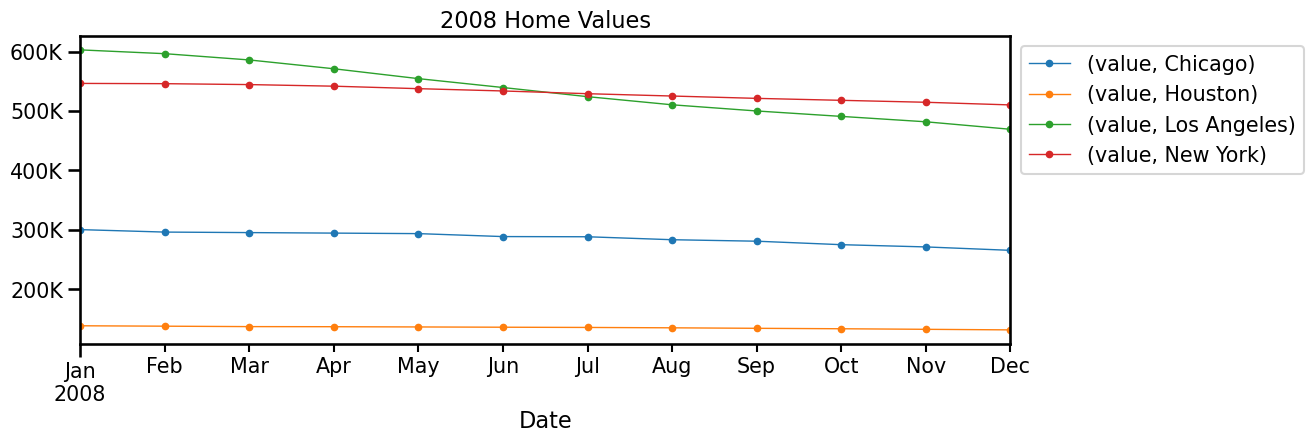

In [17]:
fig, ax = plt.subplots(figsize=(12,4))
unstacked.plot(ax=ax,title='2008 Home Values',marker='.',lw=1)
ax.yaxis.set_major_formatter(fmt_thous)
ax.legend(bbox_to_anchor=[1,1])

##  Question 1 Answer:
* We can see from the plot, that, While L.A. started 2008 having the *highest* home values, the greater trend of falling home prices for the year effected L.A. more than New York, therefore New York ended 2008 with the highest average home values.
* Houston started out with the *lowest* home values, and ended that way.

##  Question 2:
* How much did the home values change from November 2008 to December 2008 (in dollars)?

In [18]:
df_ts2 = df_ts.loc[pd.IndexSlice[:, '2008-11':'2008-12'],:]
df_ts2

value
RegionName  Date                
Chicago     2008-11-30  271059.0
            2008-12-31  265306.0
Houston     2008-11-30  132247.0
            2008-12-31  131283.0
Los Angeles 2008-11-30  481905.0
            2008-12-31  469294.0
New York    2008-11-30  514767.0
            2008-12-31  510309.0

In [19]:
ts_diff = df_ts2.diff()
ts_diff

value
RegionName  Date                
Chicago     2008-11-30       NaN
            2008-12-31   -5753.0
Houston     2008-11-30 -133059.0
            2008-12-31    -964.0
Los Angeles 2008-11-30  350622.0
            2008-12-31  -12611.0
New York    2008-11-30   45473.0
            2008-12-31   -4458.0

##  Question 2 Answer:
* Every city experienced a decrease in home values during this period.

 -  Chicago lost $5,735 in value
 
 -  Houston lost $964 
 
 - Los Angeles lost $12,611
 
  - New York Lost $ 4,458